## ENUNCIADO EJERCICIO

* Dataset Airbnb NYC https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data AB_NYC_2019.csv
    * Quitar columnas: id, host_id, host_name
    * Fecha: probar a descomponer la fecha en campos año mes y día con pandas es decir, en 3 columnas, por ejemplo usando to_datetime de pandas y los accesores de fecha para extraer año mes y día.

* EDAs (10%) (menos foco para este módulo)
    * univariantes: histogramas boxplot countplot
    * bivariantes: scatterplot
    * multivariante: corr en heatmap, pairplot
* Preprocesados (20%)
    * numéricas: imputer, scaler, transformer
    * categóricas: imputer, encoder
    * Requisito: hacer los preprocesados con Scikit Learn en lugar de métodos de pandas
* clustering y siluetas (10 %)
    * Crear una columna cluster usando KMeans o cualquier otro algoritmo de Clustering
    * Usar esa columna para hacer algún gráfico EDA como hue para colorear con scatterplot
* feature selection (10%)
    * SelectKBest para filtrar las mejores columnas y probar
    * PCA 
* Regresión (20%):
    * Predecir la columna 'price'
* Clasificación multiclase (20%)
    * Predecir la columna 'room_type'
* Comparar resultados de modelos con validación cruzada (10 %)
    * Mostrar un dataframe de resultados con las métricas calculadas
    * Opcional: mostrar boxplot de los resultados de validación cruzada como tiempos de ejecución y predicción y métricas

* Opcional:
    * Uso de pipelines opcional:
        * Opción 1: hacer las transformaciones por separado manualmente
        * Opción 2: hacer las transformaciones con pipelines
        * Opción 3: una primera parte con transformaciones manuales y una segunda parte con Pipeline
        * En ambos casos sería interesante calcular las métricas para ver qué técnicas de preprocesado van mejor
    * Vectorizar la columna texto 'name' y usar TruncatedSVD
    * Clasificación multiclase 'room_type' o regresión sobre price con TensorFlow-Keras
    * SMOTE si hay desbalanceo para el problema de clasificación multiclase 'room_type'

In [2]:
# import seaborn as sns 
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
# from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
# from sklearn.svm import SVR
# from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, RFE, RFECV

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y preprocesado con Scikit-Learn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, mean_absolute_percentage_error, classification_report, confusion_matrix, root_mean_squared_error
from sklearn.svm import SVR

# Opcionales:
from sklearn.compose import TransformedTargetRegressor  # Para transformar target en regresión
from imblearn.over_sampling import SMOTE                 # Para balanceo de clases en clasificación
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import joblib

# Carga datos e investigación del dataset

In [4]:
df = pd.read_csv('airbnb_nyc_clean.csv')
df.head(3)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,13.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,620.0,124.0,3.0,0.0,2019-06-14,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."


In [5]:
print("=== Información del DataFrame ===")
print(df.info())

=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   name                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12

* Tratamiento de la fecha: descomponer en año, mes, día

In [6]:
# df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# df['last_review_year']  = df['last_review'].dt.year
# df['last_review_month'] = df['last_review'].dt.month
# df['last_review_day']   = df['last_review'].dt.day

* Vectorizar la columna name

In [7]:
# # Vectorizar la columna name
# tfidf_vect = TfidfVectorizer()
# X_tfidf_vectorized = tfidf_vect.fit_transform(df['name'])

# # Convertir la matriz a array denso
# tfidf_array = X_tfidf_vectorized.toarray()
# # Obtener los nombres de las características (palabras) del vectorizador
# tfidf_columns = tfidf_vect.get_feature_names_out()
# # Crear un DataFrame con estos datos
# tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf_columns)
# # Concatenar este DataFrame con el original
# df = pd.concat([df, tfidf_df], axis=1)


* Borrado columnas que voy a considerar para este ejercicio, por ahora no relevantes

In [8]:
df = df.drop(['id','name','host_id','host_name','last_review', 'house_rules'], axis=1)
print(df.columns)

Index(['host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'lat',
       'long', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


* Busqueda de Nans

In [9]:
df.isna().sum()

host_identity_verified            0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

* Análisis de datos numéricos

In [10]:
df.describe()

,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000
mean,40.728070,-73.949036,2012.489503,624.736070,124.894026,4.620330,28.003896,1.301503,3.321636,8.976755,153.184287
std,0.055973,0.050470,5.756144,331.158937,66.222794,4.356887,52.035180,1.659188,1.255746,34.808447,134.421373
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,0.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.688540,-73.982790,2008.000000,339.000000,68.000000,2.000000,1.000000,0.300000,2.000000,1.000000,18.000000
50%,40.722650,-73.954390,2012.000000,624.736070,124.894026,3.000000,7.000000,0.790000,3.000000,1.000000,127.000000
75%,40.762730,-73.931380,2017.000000,911.000000,182.000000,6.000000,30.000000,1.730000,4.000000,3.000000,281.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,13.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


* Análisis de variables a predecir:
    - Price (regresión)
    - Room_type (clasificación)

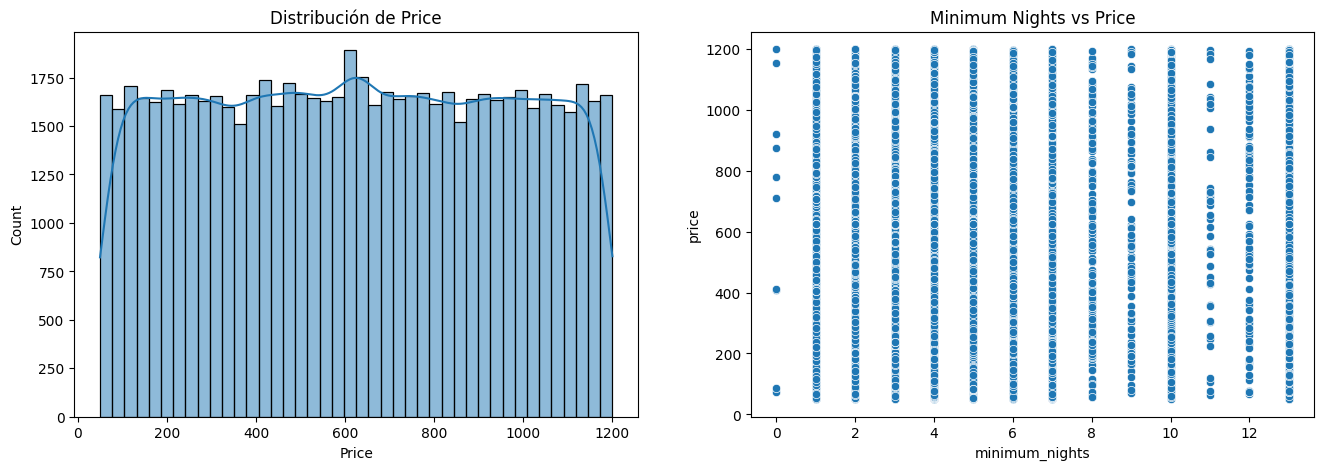

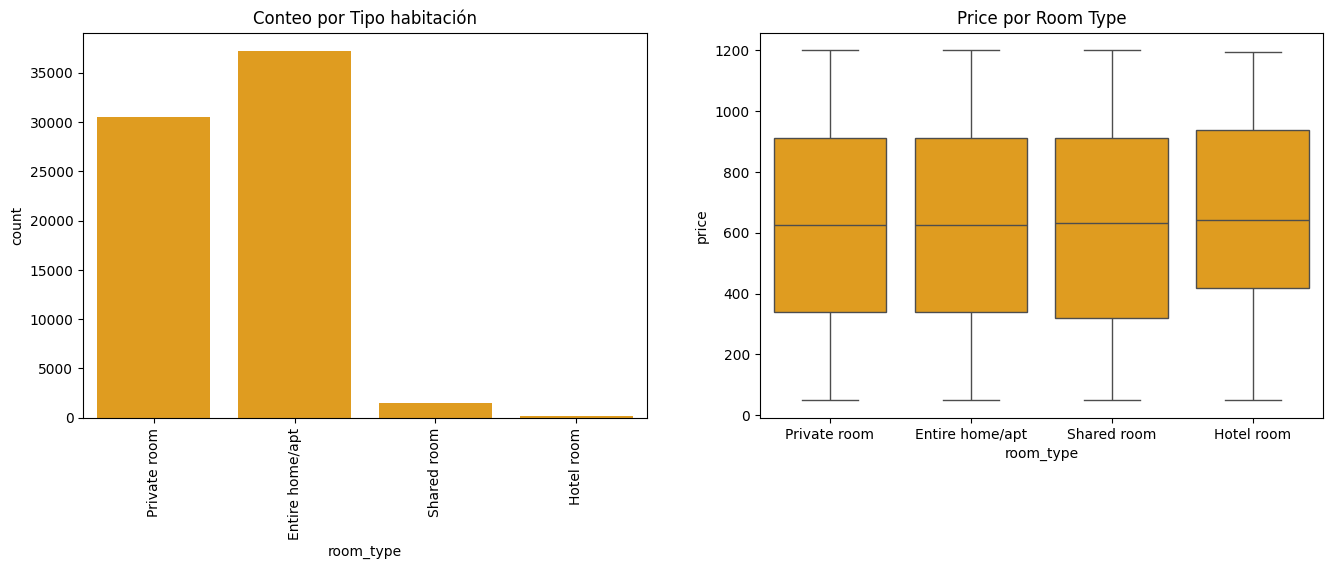

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.subplot(1, 2, 2)
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.title('Minimum Nights vs Price')
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='room_type', data=df, color='orange')
plt.title('Conteo por Tipo habitación')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.boxplot(x='room_type', y='price', data=df, color='orange')
plt.title('Price por Room Type')
plt.show()



# Regresión

* Correlaciones

In [12]:
# Matriz correlación
df.corr(numeric_only=True).round(2)

,lat,long,instant_bookable,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
lat,1.00,0.06,0.0,0.00,-0.00,-0.00,0.04,-0.03,-0.02,-0.00,0.04,-0.00
long,0.06,1.00,-0.0,0.00,0.01,0.00,-0.10,0.06,0.11,0.02,-0.11,0.05
instant_bookable,0.00,-0.00,1.0,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
construction_year,0.00,0.00,0.0,1.00,-0.00,-0.00,-0.00,0.00,0.01,0.01,-0.00,-0.00
price,-0.00,0.01,-0.0,-0.00,1.00,1.00,-0.00,0.01,0.01,-0.00,0.00,-0.00
service_fee,-0.00,0.00,0.0,-0.00,1.00,1.00,-0.00,0.01,0.00,-0.00,0.00,-0.00
minimum_nights,0.04,-0.10,-0.0,-0.00,-0.00,-0.00,1.00,-0.13,-0.27,0.02,0.23,0.07
number_of_reviews,-0.03,0.06,0.0,0.00,0.01,0.01,-0.13,1.00,0.55,-0.01,-0.08,0.07
reviews_per_month,-0.02,0.11,-0.0,0.01,0.01,0.00,-0.27,0.55,1.00,0.03,-0.04,0.04
review_rate_number,-0.00,0.02,0.0,0.01,-0.00,-0.00,0.02,-0.01,0.03,1.00,0.02,-0.01


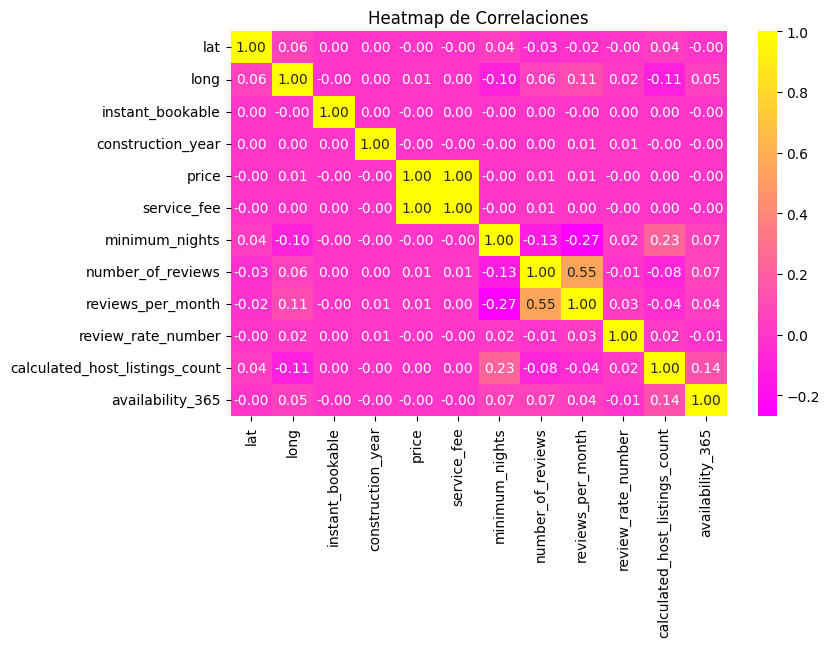

In [13]:
# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='spring', fmt=".2f")
plt.title('Heatmap de Correlaciones')
plt.show()

In [14]:
#Pairplot
#sns.pairplot(df)

## Preprocesamiento

### Imputer (Tratamiento de Nans)

In [15]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

imputer_num = SimpleImputer(strategy='mean')
df_numerical = imputer_num.fit_transform(df[numerical_cols])

imputer_cat = SimpleImputer(strategy='constant', fill_value='Other')
df_categorical = imputer_cat.fit_transform(df[categorical_cols])

df_categorical_df = pd.DataFrame(df_categorical, columns=categorical_cols, index=df.index)

df_numerical_df = pd.DataFrame(df_numerical, columns=numerical_cols, index=df.index)

df = pd.concat([df_numerical_df, df_categorical_df], axis=1).astype(df.dtypes.to_dict())

print(df.isna().sum())
df.info()


lat                               0
long                              0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
host_identity_verified            0
neighbourhood_group               0
neighbourhood                     0
instant_bookable                  0
cancellation_policy               0
room_type                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lat                             69305 non-null  float64
 1   long                            69305 non-null  float64
 2   construction_year

* Outlier

In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR

filtro = filtro = ~((df['price'] < lower_bound) | (df['price'] > upper_bound))
print(df.shape)
print(df[filtro].shape)
#df = df[filtro]


(69305, 17)
(69305, 17)


### Encoder

In [17]:
numerical_columns = df.select_dtypes(exclude=['object', 'category']).columns.to_list() # np.number alternativa
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
df_encoded = encoder.fit_transform(df[categorical_columns]) 

df = pd.concat(
    [
        pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # categoricas
        df[numerical_columns].reset_index(drop=True) # numéricas
    ],
    axis=1
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Columns: 265 entries, host_identity_verified_unconfirmed to instant_bookable
dtypes: bool(1), float64(264)
memory usage: 139.7 MB


In [18]:
print(df.columns)

Index(['host_identity_verified_unconfirmed', 'host_identity_verified_verified',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'neighbourhood_21st Street',
       'neighbourhood_5th Avenue', 'neighbourhood_Allerton',
       ...
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365',
       'instant_bookable'],
      dtype='object', length=265)


In [19]:
df_cluster = df[['lat', 'long', 'price']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_cluster)
df['cluster'].unique()

array([3, 2, 4, 0, 1], dtype=int32)

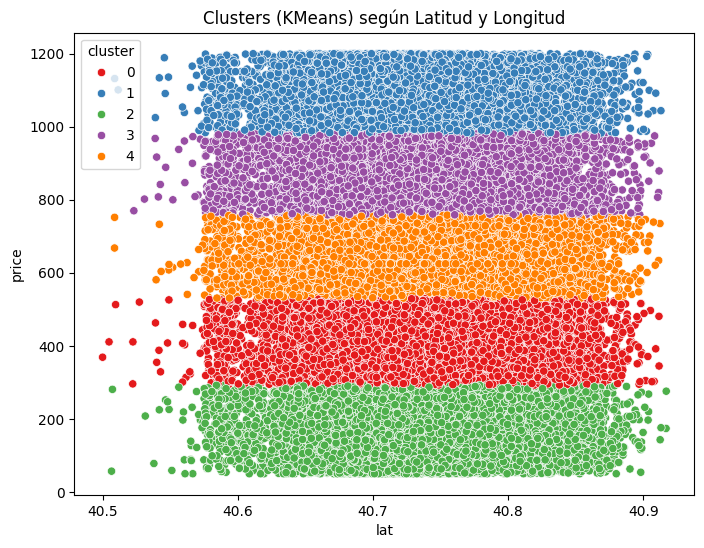

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['lat'], y=df['price'], hue=df['cluster'], data=df, palette='Set1')
plt.title('Clusters (KMeans) según Latitud y Longitud')
plt.show()

## Division de los datos

In [21]:

X= df.drop('price', axis=1)
y= df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [22]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_numeric = X_train[numeric_features].fillna(0)
selector = SelectKBest(score_func=f_regression, k=25)
selector.fit(X_numeric, y_train)
cols_selected = X_numeric.columns[selector.get_support()]
print("\nVariables numéricas seleccionadas (SelectKBest para regresión):", list(cols_selected))


Variables numéricas seleccionadas (SelectKBest para regresión): ['neighbourhood_Bayside', 'neighbourhood_Belmont', 'neighbourhood_Breezy Point', 'neighbourhood_Concourse Village', 'neighbourhood_Crown Heights', 'neighbourhood_East Morrisania', 'neighbourhood_Flatbush', 'neighbourhood_Forest Hills', 'neighbourhood_Fresh Meadows', 'neighbourhood_Grand Street', 'neighbourhood_Jamaica Hills', 'neighbourhood_Kingsbridge', 'neighbourhood_Lighthouse Hill', 'neighbourhood_Midland Beach', 'neighbourhood_Midtown', 'neighbourhood_Morris Heights', 'neighbourhood_Oakwood', 'neighbourhood_Randall Manor', 'neighbourhood_Richmondtown', 'neighbourhood_Shore Acres', 'neighbourhood_Stapleton', 'neighbourhood_Washington Heights', 'neighbourhood_Woodrow', 'service_fee', 'number_of_reviews']


In [38]:
X_train_skb = X_numeric[cols_selected]
X_test_skb = X_test[cols_selected]

In [39]:
X_test_skb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13861 entries, 35506 to 27417
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   neighbourhood_Bayside             13861 non-null  float64
 1   neighbourhood_Belmont             13861 non-null  float64
 2   neighbourhood_Breezy Point        13861 non-null  float64
 3   neighbourhood_Concourse Village   13861 non-null  float64
 4   neighbourhood_Crown Heights       13861 non-null  float64
 5   neighbourhood_East Morrisania     13861 non-null  float64
 6   neighbourhood_Flatbush            13861 non-null  float64
 7   neighbourhood_Forest Hills        13861 non-null  float64
 8   neighbourhood_Fresh Meadows       13861 non-null  float64
 9   neighbourhood_Grand Street        13861 non-null  float64
 10  neighbourhood_Jamaica Hills       13861 non-null  float64
 11  neighbourhood_Kingsbridge         13861 non-null  float64
 12  neigh

In [25]:
df_resultados = pd.DataFrame(columns=['Modelo', 'Preprocesado', 'R2', 'MAE', 'RMSE', 'MAPE'])

In [26]:
def calculate(preprocessor_name, X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42)
   }
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df_resultados.loc[len(df_resultados)] = [model_name, preprocessor_name, r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred),root_mean_squared_error(y_test, y_pred),mean_absolute_percentage_error(y_test, y_pred)]
    
    return df_resultados.sort_values('R2', ascending=False)

In [27]:
calculate('Sin preprocesado', X_train, X_test, y_train, y_test)


,Modelo,Preprocesado,R2,MAE,RMSE,MAPE
4,RandomForest,Sin preprocesado,0.999782,1.593088,4.887372,0.004175
3,DecisionTree,Sin preprocesado,0.999664,1.908620,6.062056,0.005141
0,LinearRegression,Sin preprocesado,0.994200,3.346293,25.185385,0.008625
1,KNN,Sin preprocesado,0.991701,10.471105,30.126823,0.029701
2,SVR,Sin preprocesado,0.512816,199.356665,230.826420,0.711133


In [40]:
calculate('Con SelectKBest', X_train_skb, X_test_skb, y_train, y_test)

,Modelo,Preprocesado,R2,MAE,RMSE,MAPE
0,LinearRegression,Con SelectKBest,0.994213,3.060579,25.158249,0.007926
1,KNN,Con SelectKBest,0.993376,4.352268,26.915654,0.011634
4,RandomForest,Con SelectKBest,0.993072,3.895064,27.525316,0.010272
3,DecisionTree,Con SelectKBest,0.992379,3.913593,28.869688,0.010503
2,SVR,Con SelectKBest,0.991575,6.084096,30.354922,0.023864


In [28]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)
# X_train_scaled

In [29]:
#calculate('MinMaxScaler', X_train, X_test, y_train, y_test)

In [30]:
# selector = RFECV(RandomForestRegressor(random_state=42), min_features_to_select=5, cv=5, scoring='r2')
# X_train_selected = selector.fit_transform(X_train, y_train)
# X_test_selected = selector.transform(X_test)

# print('Número de columnas originales:', X_train.shape[1])
# print('Número de columnas filtradas:', X_train_selected.shape[1])
# print('selector n_features_:', selector.n_features_)
# print('selector feature_names_in_:', selector.feature_names_in_)

# selected_columns = X_train.columns[selector.get_support()]
# print('Columnas seleccionadas', selected_columns.to_list())


In [31]:
# model = selector.estimator_
# print('accuracy train', model.score(X_train_selected, y_train))
# print('accuracy test', model.score(X_test_selected, y_test))

In [32]:
# pd.DataFrame(selector.cv_results_).sort_values('mean_test_score',ascending=False)

In [33]:
df_resultados = pd.DataFrame(columns=['Modelo', 'Preprocesado', 'R2', 'MAE', 'RMSE', 'MAPE'])

In [34]:
def calculate_metrics(X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42)
    }
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df_resultados.loc[len(df_resultados)] = [model_name, r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred),root_mean_squared_error(y_test, y_pred),mean_absolute_percentage_error(y_test, y_pred)]
    
    return df_resultados.sort_values('R2', ascending=False)

In [35]:
calculate_metrics(X_train[numerical_cols], X_test, y_train, y_test)

KeyError: "['price'] not in index"